In [132]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import wordpunct_tokenize
import matplotlib.pyplot as plt
import numpy as np
#from vaderSentiment.vaderSentiment import sentiment as vaderSentiment

In [133]:
sid = SentimentIntensityAnalyzer()
#use this for winner

In [134]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#use this for losers
sia = SIA()
#sia.lexicon

In [142]:
new_words = {
    'robbed': 2.0,
    'saddened': 2.4,
    'sad' : 2.1,
    'angry': 1.6,
    'upset': 1.2
}
sia.lexicon.update(new_words)

In [143]:
import re
def emoji(text):
    a = text
    d = "\xf0" 
    result = [d+x for x in str(a).split(d)]
    result[0] = result[0].strip(d)
    result = ' '.join(result)
#print result
#comment_with_emoji:    
    for word in result.split():
 #   print word
        if word in emoji_dict:
            result = result.replace(word, emoji_dict[word])
    return result

   

Adam Levine's Team


In [144]:
Drew_Cole = pd.read_csv("data_by_mentors\Adam_Levine\Drew_Cole.csv")
Drew_Cole['commentText'] = Drew_Cole['commentText'].map(emoji)

Jackie_Verna = pd.read_csv("data_by_mentors\Adam_Levine\Jackie_Verna.csv")
Jackie_Verna['commentText'] = Jackie_Verna['commentText'].map(emoji)

Mia_Boostrom = pd.read_csv("data_by_mentors\Adam_Levine\Mia_Boostrom.csv")
Mia_Boostrom['commentText'] = Mia_Boostrom['commentText'].map(emoji)

Reid_Umstattd = pd.read_csv("data_by_mentors\Adam_Levine\Reid_Umstattd.csv")
Reid_Umstattd['commentText'] = Reid_Umstattd['commentText'].map(emoji)

Appended all of Adam's contenstants into a dataframe called Adam_Levine

In [145]:
Adam_Levine = Drew_Cole

Adam_Levine.append(Jackie_Verna)
Adam_Levine.append(Mia_Boostrom)
Adam_Levine.append(Reid_Umstattd)
print

Alicia_Keys's Team

In [146]:
Christiana_Danielle = pd.read_csv("data_by_mentors\Alicia_Keys\Christiana_Danielle.csv")
Christiana_Danielle['commentText'] = Christiana_Danielle['commentText'].map(emoji)

Johnny_Bliss = pd.read_csv("data_by_mentors\Alicia_Keys\Johnny_Bliss.csv")
Johnny_Bliss['commentText'] = Johnny_Bliss['commentText'].map(emoji)

Kelsea_Johnson = pd.read_csv("data_by_mentors\Alicia_Keys\Kelsea_Johnson.csv")
Kelsea_Johnson['commentText'] = Kelsea_Johnson['commentText'].map(emoji)

Terrence_Cunningham = pd.read_csv("data_by_mentors\Alicia_Keys\Terrence_Cunningham.csv")
Terrence_Cunningham['commentText'] = Terrence_Cunningham['commentText'].map(emoji)

In [147]:
Alicia_Keys = Christiana_Danielle

Alicia_Keys.append(Johnny_Bliss)
Alicia_Keys.append(Kelsea_Johnson)
Alicia_Keys.append(Terrence_Cunningham)
print

Blake_Shelton's Team

In [148]:
Austin_Giorgio = pd.read_csv("data_by_mentors\Blake_Shelton\Austin_Giorgio.csv")
Austin_Giorgio['commentText'] = Austin_Giorgio['commentText'].map(emoji)

Gary_Edwards = pd.read_csv("data_by_mentors\Blake_Shelton\Gary_Edwards.csv")
Gary_Edwards['commentText'] = Gary_Edwards['commentText'].map(emoji)

Spensha_Baker = pd.read_csv("data_by_mentors\Blake_Shelton\Spensha_Baker.csv")
Spensha_Baker['commentText'] = Spensha_Baker['commentText'].map(emoji)

Wilkes = pd.read_csv("data_by_mentors\Blake_Shelton\Wilkes.csv")
Wilkes['commentText'] = Wilkes['commentText'].map(emoji)

In [149]:
Blake_Shelton = Austin_Giorgio

Blake_Shelton.append(Gary_Edwards)
Blake_Shelton.append(Spensha_Baker)
Blake_Shelton.append(Wilkes)
print

Kelly_Clarkson's Team

In [150]:
Alexa_Cappelli = pd.read_csv("data_by_mentors\Kelly_Clarkson\Alexa_Cappelli.csv")
Alexa_Cappelli['commentText'] = Alexa_Cappelli['commentText'].map(emoji)

DR_King = pd.read_csv("data_by_mentors\Kelly_Clarkson\DR_King.csv")
DR_King['commentText'] = DR_King['commentText'].map(emoji)

Dylan_Hartigan = pd.read_csv("data_by_mentors\Kelly_Clarkson\Dylan_Hartigan.csv")
Dylan_Hartigan['commentText'] = Dylan_Hartigan['commentText'].map(emoji)

Tish_Haynes_Keys = pd.read_csv("data_by_mentors\Kelly_Clarkson\Tish_Haynes_Keys.csv")
Tish_Haynes_Keys['commentText'] = Tish_Haynes_Keys['commentText'].map(emoji)

In [151]:
Kelly_Clarkson = Alexa_Cappelli

Kelly_Clarkson.append(DR_King)
Kelly_Clarkson.append(Dylan_Hartigan)
Kelly_Clarkson.append(Tish_Haynes_Keys)
print

In [152]:
def get_comment_sentiment_no_reviews_winners(comment_series):
    fail_count = 0
    neu_sentiment_list = []
    sentiment_dict= {"neg":[], "neu":[], "pos":[], "compound":[]}
    for index, comment_message in enumerate(comment_series):
        try:
            sentiment_score_dict = sid.polarity_scores(comment_message)
            for j in sentiment_score_dict:
                sentiment_dict[j].append(sentiment_score_dict[j])
        except:
            continue
    
        if sentiment_dict["compound"][-1] == 0.0:
#            print("find", index)
            neu_sentiment_list.append(index)
    print(len(neu_sentiment_list),"over", len(comment_series), "posts of sentiments are neutral")
    return( pd.DataFrame(sentiment_dict), neu_sentiment_list)

In [153]:
def get_comment_sentiment_no_reviews(comment_series):
    fail_count = 0
    neu_sentiment_list = []
    sentiment_dict= {"neg":[], "neu":[], "pos":[], "compound":[]}
    for index, comment_message in enumerate(comment_series):
        try:
            sentiment_score_dict = sia.polarity_scores(comment_message)
            for j in sentiment_score_dict:
                sentiment_dict[j].append(sentiment_score_dict[j])
        except:
            continue
    
        if sentiment_dict["compound"][-1] == 0.0:
#            print("find", index)
            neu_sentiment_list.append(index)
    print(len(neu_sentiment_list),"over", len(comment_series), "posts of sentiments are neutral")
    return( pd.DataFrame(sentiment_dict), neu_sentiment_list)

Adam Levine DataFrame-- calculating sentiments of the entire team as a whole

In [154]:
Adam_Levine_sentiment, Adam_Levine_neu_i = get_comment_sentiment_no_reviews(Adam_Levine['commentText'])
Adam_Levine_sentiment[:10]
pd.DataFrame(Adam_Levine_sentiment).describe()

(83, 'over', 162, 'posts of sentiments are neutral')


,compound,neg,neu,pos
count,162.000000,162.000000,162.000000,162.000000
mean,0.130641,0.053290,0.802043,0.138481
std,0.385134,0.135087,0.247873,0.208763
min,-0.938200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.639750,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.440400,0.000000,1.000000,0.255250
max,0.929300,1.000000,1.000000,0.804000


Calculating Sentiments of each person on his team

In [156]:

Drew_Cole_sentiment, Drew_Cole_neu_i = get_comment_sentiment_no_reviews(Drew_Cole['commentText'])
Drew_Cole_sentiment[:3]

#winner
Jackie_Verna_sentiment, Jackie_Verna_neu_i = get_comment_sentiment_no_reviews_winners(Jackie_Verna['commentText'])
Jackie_Verna_sentiment[:3]

Mia_Boostrom_sentiment, Mia_Boostrom_neu_i = get_comment_sentiment_no_reviews(Mia_Boostrom['commentText'])
Mia_Boostrom_sentiment[:3]

Reid_Umstattd_sentiment, Reid_Umstattd_neu_i = get_comment_sentiment_no_reviews(Reid_Umstattd['commentText'])
Reid_Umstattd_sentiment[:3]
print

(83, 'over', 162, 'posts of sentiments are neutral')
(173, 'over', 315, 'posts of sentiments are neutral')
(82, 'over', 165, 'posts of sentiments are neutral')
(66, 'over', 133, 'posts of sentiments are neutral')



In [157]:
pd.DataFrame({'Drew_Cole': Drew_Cole_sentiment['compound'],
              "Jackie_Verna": Jackie_Verna_sentiment['compound'], 
              "Mia_Boostrom": Mia_Boostrom_sentiment['compound'],
             "Reid_Umstattd": Reid_Umstattd_sentiment['compound']}).describe()

,Drew_Cole,Jackie_Verna,Mia_Boostrom,Reid_Umstattd
count,162.000000,315.000000,165.000000,133.000000
mean,0.130641,0.105049,0.059973,0.096961
std,0.385134,0.398239,0.394753,0.405000
min,-0.938200,-0.911800,-0.839500,-0.889800
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.440400,0.317050,0.233300,0.440400
max,0.929300,0.979400,0.966300,0.987300


Alicia_Keys DataFrame-- calculating sentiments of the entire team as a whole

In [158]:
Alicia_Keys_sentiment, Alicia_Keys_neu_i = get_comment_sentiment_no_reviews(Alicia_Keys['commentText'])
Alicia_Keys_sentiment[:10]
pd.DataFrame(Alicia_Keys_sentiment).describe()

(295, 'over', 679, 'posts of sentiments are neutral')


,compound,neg,neu,pos
count,679.000000,679.000000,679.000000,679.000000
mean,0.183353,0.066694,0.764526,0.168784
std,0.431465,0.150160,0.253977,0.227395
min,-0.905500,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.587500,0.000000
50%,0.000000,0.000000,0.802000,0.000000
75%,0.585900,0.048000,1.000000,0.308000
max,0.980900,1.000000,1.000000,1.000000


In [159]:
#winner
Christiana_Danielle_sentiment, Christiana_Danielle_neu_i = get_comment_sentiment_no_reviews_winners(Christiana_Danielle['commentText'])
Christiana_Danielle_sentiment[:3]

Johnny_Bliss_sentiment, Johnny_Bliss_neu_i = get_comment_sentiment_no_reviews(Johnny_Bliss['commentText'])
Johnny_Bliss_sentiment[:3]

Kelsea_Johnson_sentiment, Kelsea_Johnson_neu_i = get_comment_sentiment_no_reviews(Kelsea_Johnson['commentText'])
Kelsea_Johnson_sentiment[:3]

Terrence_Cunningham_sentiment, Terrence_Cunningham_neu_i = get_comment_sentiment_no_reviews(Terrence_Cunningham['commentText'])
Terrence_Cunningham_sentiment[:3]
print

(296, 'over', 679, 'posts of sentiments are neutral')
(67, 'over', 165, 'posts of sentiments are neutral')
(121, 'over', 299, 'posts of sentiments are neutral')
(195, 'over', 444, 'posts of sentiments are neutral')



In [160]:
pd.DataFrame({'Christiana_Danielle': Christiana_Danielle_sentiment['compound'],
              "Johnny_Bliss": Johnny_Bliss_sentiment['compound'], 
              "Kelsea_Johnson": Kelsea_Johnson_sentiment['compound'],
             "Terrence_Cunningham": Terrence_Cunningham_sentiment['compound']}).describe()

,Christiana_Danielle,Johnny_Bliss,Kelsea_Johnson,Terrence_Cunningham
count,679.000000,165.000000,299.000000,444.000000
mean,0.178107,0.172967,0.241925,0.105520
std,0.432017,0.422003,0.413142,0.411851
min,-0.905500,-0.840400,-0.905000,-0.940900
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.578900,0.476700,0.624900,0.376200
max,0.980900,0.979600,0.996400,0.995300


Blake_Shelton DataFrame-- calculating sentiments of the entire team as a whole

In [161]:
Blake_Shelton_sentiment, Blake_Shelton_neu_i = get_comment_sentiment_no_reviews(Blake_Shelton['commentText'])
Blake_Shelton_sentiment[:10]
pd.DataFrame(Blake_Shelton_sentiment).describe()

(117, 'over', 290, 'posts of sentiments are neutral')


,compound,neg,neu,pos
count,290.000000,290.000000,290.000000,290.000000
mean,0.170966,0.083300,0.758617,0.158093
std,0.432907,0.177949,0.251859,0.208391
min,-0.862200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.592250,0.000000
50%,0.000000,0.000000,0.783500,0.000000
75%,0.542050,0.076750,1.000000,0.272750
max,0.987500,1.000000,1.000000,1.000000


In [162]:
Austin_Giorgio_sentiment, Austin_Giorgio_neu_i = get_comment_sentiment_no_reviews(Austin_Giorgio['commentText'])
Austin_Giorgio_sentiment

Gary_Edwards_sentiment, Gary_Edwards_neu_i = get_comment_sentiment_no_reviews(Gary_Edwards['commentText'])
Gary_Edwards_sentiment[:3]

#winner
Spensha_Baker_sentiment, Spensha_Baker_neu_i = get_comment_sentiment_no_reviews_winners(Spensha_Baker['commentText'])
Spensha_Baker_sentiment[:3]

Wilkes_sentiment, Wilkes_neu_i = get_comment_sentiment_no_reviews(Wilkes['commentText'])
Wilkes_sentiment[:3]
print

(117, 'over', 290, 'posts of sentiments are neutral')
(107, 'over', 204, 'posts of sentiments are neutral')
(55, 'over', 146, 'posts of sentiments are neutral')
(155, 'over', 404, 'posts of sentiments are neutral')



In [163]:
pd.DataFrame({'Austin_Giorgio': Austin_Giorgio_sentiment['compound'],
              "Gary_Edwards": Gary_Edwards_sentiment['compound'], 
              "Spensha_Baker": Spensha_Baker_sentiment['compound'],
             "Wilkes": Wilkes_sentiment['compound']}).describe()

,Austin_Giorgio,Gary_Edwards,Spensha_Baker,Wilkes
count,290.000000,204.000000,146.000000,404.000000
mean,0.170966,0.175387,0.218455,0.232816
std,0.432907,0.409346,0.457530,0.441657
min,-0.862200,-0.812600,-0.909700,-0.893400
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.542050,0.496000,0.624900,0.636025
max,0.987500,0.983700,0.950100,0.990300


Kelly_Clarkson DataFrame-- calculating sentiments of the entire team as a whole

In [164]:
Kelly_Clarkson_sentiment, Kelly_Clarkson_neu_i = get_comment_sentiment_no_reviews(Kelly_Clarkson['commentText'])
Kelly_Clarkson_sentiment[:10]
pd.DataFrame(Kelly_Clarkson_sentiment).describe()

(77, 'over', 173, 'posts of sentiments are neutral')


,compound,neg,neu,pos
count,173.000000,173.000000,173.000000,173.000000
mean,0.171929,0.061746,0.763376,0.174884
std,0.429960,0.136304,0.258221,0.232613
min,-0.908100,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.564000,0.000000
50%,0.000000,0.000000,0.813000,0.000000
75%,0.517100,0.055000,1.000000,0.303000
max,0.971900,0.756000,1.000000,1.000000


In [165]:
Alexa_Cappelli_sentiment, Alexa_Cappelli_neu_i = get_comment_sentiment_no_reviews(Alexa_Cappelli['commentText'])
Alexa_Cappelli_sentiment

#winner
DR_King_sentiment, DR_King_neu_i = get_comment_sentiment_no_reviews_winners(DR_King['commentText'])
DR_King_sentiment[:3]

Dylan_Hartigan_sentiment, Dylan_Hartigan_neu_i = get_comment_sentiment_no_reviews(Dylan_Hartigan['commentText'])
Dylan_Hartigan_sentiment[:3]

Tish_Haynes_Keys_sentiment, Tish_Haynes_Keys_neu_i = get_comment_sentiment_no_reviews(Tish_Haynes_Keys['commentText'])
Tish_Haynes_Keys_sentiment[:3]
print


(77, 'over', 173, 'posts of sentiments are neutral')
(78, 'over', 163, 'posts of sentiments are neutral')
(128, 'over', 256, 'posts of sentiments are neutral')
(114, 'over', 212, 'posts of sentiments are neutral')



In [166]:
pd.DataFrame({'Alexa_Cappelli': Alexa_Cappelli_sentiment['compound'],
              "DR_King": DR_King_sentiment['compound'], 
              "Dylan_Hartigan": Dylan_Hartigan_sentiment['compound'],
             "Tish_Haynes_Keys": Tish_Haynes_Keys_sentiment['compound']}).describe()

,Alexa_Cappelli,DR_King,Dylan_Hartigan,Tish_Haynes_Keys
count,173.000000,163.000000,256.000000,212.000000
mean,0.171929,0.228078,0.128592,0.148300
std,0.429960,0.429083,0.393087,0.380374
min,-0.908100,-0.891000,-0.938200,-0.919500
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.517100,0.641800,0.423875,0.458800
max,0.971900,0.977600,0.992700,0.990400


Text(0.5,0,"['Adam', 'Alicia', ' Blake', 'Kelly']")

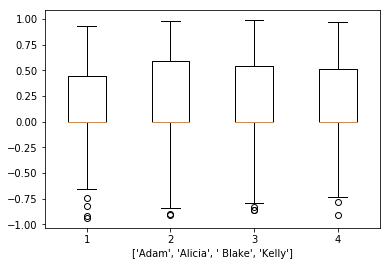

In [167]:
plt.boxplot([Adam_Levine_sentiment['compound'], Alicia_Keys_sentiment['compound'], Blake_Shelton_sentiment['compound'], Kelly_Clarkson_sentiment['compound']])
plt.xlabel(['Adam' ,'Alicia',' Blake', 'Kelly'])

Text(0.5,1,'Average Sentiment Score of Whole Team')

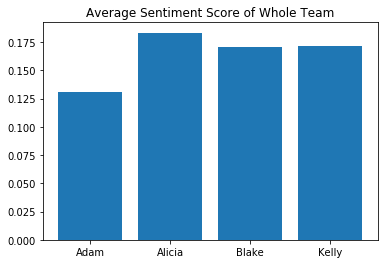

In [168]:
#ad = Adam_Levine_sentiment['compound'].groupby(np.arange(len(Adam_Levine_sentiment['compound']))//15).mean()
plt.bar(('Adam', 'Alicia', 'Blake', 'Kelly'),[Adam_Levine_sentiment['compound'].mean(),Alicia_Keys_sentiment['compound'].mean(),Blake_Shelton_sentiment['compound'].mean(),Kelly_Clarkson_sentiment['compound'].mean()]) 
plt.title('Average Sentiment Score of Whole Team')

Text(0.5,1,"Adam's Teams")

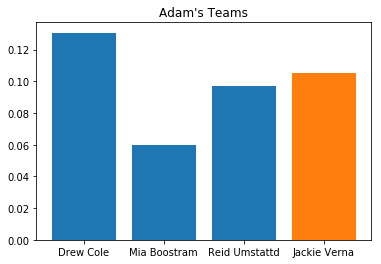

In [169]:
#'Drew_Cole': Drew_Cole_sentiment['compound'],
#              "Jackie_Verna": Jackie_Verna_sentiment['compound'], 
#              "Mia_Boostrom": Mia_Boostrom_sentiment['compound'],
#             "Reid_Umstattd": Reid_Umstattd_sentiment['compound']
plt.bar(('Drew Cole', 'Mia Boostram', 'Reid Umstattd'), [Drew_Cole_sentiment['compound'].mean(),Mia_Boostrom_sentiment['compound'].mean(),Reid_Umstattd_sentiment['compound'].mean() ])
plt.bar('Jackie Verna', Jackie_Verna_sentiment['compound'].mean())
plt.title('Adam\'s Teams')

Text(0.5,1,"Alicia's Team")

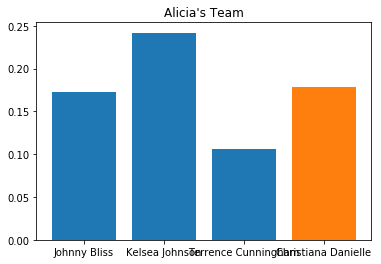

In [170]:
#'Christiana_Danielle': Christiana_Danielle_sentiment['compound'],
#              "Johnny_Bliss": Johnny_Bliss_sentiment['compound'], 
#              "Kelsea_Johnson": Kelsea_Johnson_sentiment['compound'],
#             "Terrence_Cunningham": Terrence_Cunningham_sentiment['compound']

plt.bar(('Johnny Bliss', 'Kelsea Johnson', 'Terrence Cunningham'), [Johnny_Bliss_sentiment['compound'].mean(),Kelsea_Johnson_sentiment['compound'].mean(),Terrence_Cunningham_sentiment['compound'].mean() ])
plt.bar('Christiana Danielle', Christiana_Danielle_sentiment['compound'].mean())
plt.title('Alicia\'s Team')

Text(0.5,1,"Blake's Team")

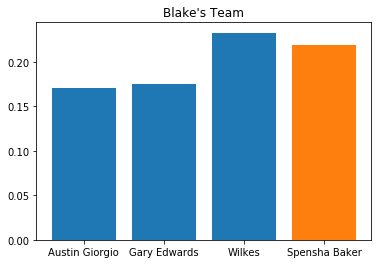

In [171]:
##Austin_Giorgio': Austin_Giorgio_sentiment['compound'],
 #             "Gary_Edwards": Gary_Edwards_sentiment['compound'], 
 #             "Spensha_Baker": Spensha_Baker_sentiment['compound'],
 #            "Wilkes": Wilkes_sentiment['compound']

plt.bar(('Austin Giorgio', 'Gary Edwards', 'Wilkes'), [Austin_Giorgio_sentiment['compound'].mean(),Gary_Edwards_sentiment['compound'].mean(),
                                                       Wilkes_sentiment['compound'].mean() ])
plt.bar('Spensha Baker', Spensha_Baker_sentiment['compound'].mean())
plt.title('Blake\'s Team')

Text(0.5,1,"Kelly's Team")

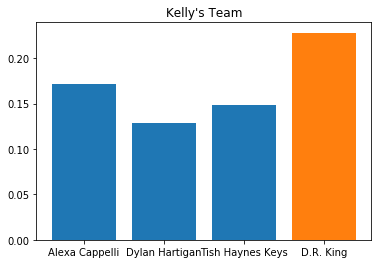

In [172]:
#'Alexa_Cappelli': Alexa_Cappelli_sentiment['compound'],
#              "DR_King": DR_King_sentiment['compound'], 
#              "Dylan_Hartigan": Dylan_Hartigan_sentiment['compound'],
#             "Tish_Haynes_Keys": Tish_Haynes_Keys_sentiment['compound']

plt.bar(('Alexa Cappelli', 'Dylan Hartigan', 'Tish Haynes Keys'), [Alexa_Cappelli_sentiment['compound'].mean(),Dylan_Hartigan_sentiment['compound'].mean(),
                                                       Tish_Haynes_Keys_sentiment['compound'].mean() ])
plt.bar('D.R. King', DR_King_sentiment['compound'].mean())
plt.title('Kelly\'s Team')

In [173]:
#comments are coming in as utf-8 so I am using this code to change it back to ascii
def unicodetoascii(text):

    TEXT = (text.
    		replace('\xe2\x80\x99', "'").
            replace('\xc3\xa9', 'e').
            replace('\xe2\x80\x90', '-').
            replace('\xe2\x80\x91', '-').
            replace('\xe2\x80\x92', '-').
            replace('\xe2\x80\x93', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x98', "'").
            replace('\xe2\x80\x9b', "'").
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9d', '"').
            replace('\xe2\x80\x9e', '"').
            replace('\xe2\x80\x9f', '"').
            replace('\xe2\x80\xa6', '...').#
            replace('\xe2\x80\xb2', "'").
            replace('\xe2\x80\xb3', "'").
            replace('\xe2\x80\xb4', "'").
            replace('\xe2\x80\xb5', "'").
            replace('\xe2\x80\xb6', "'").
            replace('\xe2\x80\xb7', "'").
            replace('\xe2\x81\xba', "+").
            replace('\xe2\x81\xbb', "-").
            replace('\xe2\x81\xbc', "=").
            replace('\xe2\x81\xbd', "(").
            replace('\xe2\x81\xbe', ")")

                 )
    return TEXT

In [ ]:
emoji_dict = {
    '\xf0\x9f\x98\x81': 'grinning face with smiling eyes',
    '\xf0\x9f\x98\x82': 'face with tears of joy',
    '\xf0\x9f\x98\x83': 'smiling face with open mouth',
    '\xf0\x9f\x98\x84': 'smiling face with open mouth and smiling eyes',
    '\xf0\x9f\x98\x85': 'smiling face with open mouth and cold sweat',
    '\xf0\x9f\x98\x86': 'smiling face with open mouth and tightly-closed eyes',
    '\xf0\x9f\x98\x89': 'winking face',
    '\xf0\x9f\x98\x8a': 'smiling face with smiling eyes',
    '\xf0\x9f\x98\x8b': 'face savouring delicious food',
    '\xf0\x9f\x98\x8c': 'relieved face',
    '\xf0\x9f\x98\x8d': 'smiling face with heart-shaped eyes',
    '\xf0\x9f\x98\x8f': 'smirking face',
    '\xf0\x9f\x98\x92': 'unamused face',
    '\xf0\x9f\x98\x93': 'face with cold sweat',
    '\xf0\x9f\x98\x94': 'pensive face',
    '\xf0\x9f\x98\x96': 'confounded face',
    '\xf0\x9f\x98\x98': 'face throwing a kiss',
    '\xf0\x9f\x98\x9a': 'kissing face with closed eyes',
    '\xf0\x9f\x98\x9c': 'face with stuck-out tongue and winking eye',
    '\xf0\x9f\x98\x9d': 'face with stuck-out tongue and tightly-closed eyes',
    '\xf0\x9f\x98\x9e': 'disappointed face',
    '\xf0\x9f\x98\xa0': 'angry face',
    '\xf0\x9f\x98\xa1': 'pouting face',
    '\xf0\x9f\x98\xa2': 'crying face',
    '\xf0\x9f\x98\xa3': 'persevering face',
    '\xf0\x9f\x98\xa4': 'face with look of triumph',
    '\xf0\x9f\x98\xa5': 'disappointed but relieved face',
    '\xf0\x9f\x98\xa8': 'fearful face',
    '\xf0\x9f\x98\xa9': 'weary face',
    '\xf0\x9f\x98\xaa': 'sleepy face',
    '\xf0\x9f\x98\xab': 'tired face',
    '\xf0\x9f\x98\xad': 'loudly crying face',
    '\xf0\x9f\x98\xb0': 'face with open mouth and cold sweat',
    '\xf0\x9f\x98\xb1': 'face screaming in fear',
    '\xf0\x9f\x98\xb2': 'astonished face',
    '\xf0\x9f\x98\xb3': 'flushed face',
    '\xf0\x9f\x98\xb5': 'dizzy face',
    '\xf0\x9f\x98\xb7': 'face with medical mask',
    '\xf0\x9f\x98\xb8': 'grinning cat face with smiling eyes',
    '\xf0\x9f\x98\xb9': 'cat face with tears of joy',
    '\xf0\x9f\x98\xba': 'smiling cat face with open mouth',
    '\xf0\x9f\x98\xbb': 'smiling cat face with heart-shaped eyes',
    '\xf0\x9f\x98\xbc': 'cat face with wry smile',
    '\xf0\x9f\x98\xbd': 'kissing cat face with closed eyes',
    '\xf0\x9f\x98\xbe': 'pouting cat face',
    '\xf0\x9f\x98\xbf': 'crying cat face',
    '\xf0\x9f\x99\x80': 'weary cat face',
    '\xf0\x9f\x99\x85': 'face with no good gesture',
    '\xf0\x9f\x99\x86': 'face with ok gesture',
    '\xf0\x9f\x99\x87': 'person bowing deeply',
    '\xf0\x9f\x99\x88': 'see-no-evil monkey',
    '\xf0\x9f\x99\x89': 'hear-no-evil monkey',
    '\xf0\x9f\x99\x8a': 'speak-no-evil monkey',
    '\xf0\x9f\x99\x8b': 'happy person raising one hand',
    '\xf0\x9f\x99\x8c': 'person raising both hands in celebration',
    '\xf0\x9f\x99\x8d': 'person frowning',
    '\xf0\x9f\x99\x8e': 'person with pouting face',
    '\xf0\x9f\x99\x8f': 'person with folded hands',
    '\x23\xe2\x83\xa3': 'number sign + combining enclosing keycap',
    '\x30\xe2\x83\xa3': 'digit zero + combining enclosing keycap',
    '\x31\xe2\x83\xa3': 'digit one + combining enclosing keycap',
    '\x32\xe2\x83\xa3': 'digit two + combining enclosing keycap',
    '\x33\xe2\x83\xa3': 'digit three + combining enclosing keycap',
    '\x34\xe2\x83\xa3': 'digit four + combining enclosing keycap',
    '\x35\xe2\x83\xa3': 'digit five + combining enclosing keycap',
    '\x36\xe2\x83\xa3': 'digit six + combining enclosing keycap',
    '\x37\xe2\x83\xa3': 'digit seven + combining enclosing keycap',
    '\x38\xe2\x83\xa3': 'digit eight + combining enclosing keycap',
    '\x39\xe2\x83\xa3': 'digit nine + combining enclosing keycap',
    '\xc2\xa9': 'copyright sign',
    '\xc2\xae': 'registered sign',
    '\xe2\x80\xbc': 'double exclamation mark',
    '\xe2\x81\x89': 'exclamation question mark',
    '\xe2\x84\xa2': 'trade mark sign',
    '\xe2\x84\xb9': 'information source',
    '\xe2\x86\x94': 'left right arrow',
    '\xe2\x86\x95': 'up down arrow',
    '\xe2\x86\x96': 'north west arrow',
    '\xe2\x86\x97': 'north east arrow',
    '\xe2\x86\x98': 'south east arrow',
    '\xe2\x86\x99': 'south west arrow',
    '\xe2\x86\xa9': 'leftwards arrow with hook',
    '\xe2\x86\xaa': 'rightwards arrow with hook',
    '\xe2\x8c\x9a': 'watch',
    '\xe2\x8c\x9b': 'hourglass',
    '\xe2\x8f\xa9': 'black right-pointing double triangle',
    '\xe2\x8f\xaa': 'black left-pointing double triangle',
    '\xe2\x8f\xab': 'black up-pointing double triangle',
    '\xe2\x8f\xac': 'black down-pointing double triangle',
    '\xe2\x8f\xb0': 'alarm clock',
    '\xe2\x8f\xb3': 'hourglass with flowing sand',
    '\xe2\x93\x82': 'circled latin capital letter m',
    '\xe2\x96\xaa': 'black small square',
    '\xe2\x96\xab': 'white small square',
    '\xe2\x96\xb6': 'black right-pointing triangle',
    '\xe2\x97\x80': 'black left-pointing triangle',
    '\xe2\x97\xbb': 'white medium square',
    '\xe2\x97\xbc': 'black medium square',
    '\xe2\x97\xbd': 'white medium small square',
    '\xe2\x97\xbe': 'black medium small square',
    '\xe2\x98\x80': 'black sun with rays',
    '\xe2\x98\x81': 'cloud',
    '\xe2\x98\x8e': 'black telephone',
    '\xe2\x98\x91': 'ballot box with check',
    '\xe2\x98\x94': 'umbrella with rain drops',
    '\xe2\x98\x95': 'hot beverage',
    '\xe2\x98\x9d': 'white up pointing index',
    '\xe2\x98\xba': 'white smiling face',
    '\xe2\x99\x88': 'aries',
    '\xe2\x99\x89': 'taurus',
    '\xe2\x99\x8a': 'gemini',
    '\xe2\x99\x8b': 'cancer',
    '\xe2\x99\x8c': 'leo',
    '\xe2\x99\x8d': 'virgo',
    '\xe2\x99\x8e': 'libra',
    '\xe2\x99\x8f': 'scorpius',
    '\xe2\x99\x90': 'sagittarius',
    '\xe2\x99\x91': 'capricorn',
    '\xe2\x99\x92': 'aquarius',
    '\xe2\x99\x93': 'pisces',
    '\xe2\x99\xa0': 'black spade suit',
    '\xe2\x99\xa3': 'black club suit',
    '\xe2\x99\xa5': 'black heart suit',
    '\xe2\x99\xa6': 'black diamond suit',
    '\xe2\x99\xa8': 'hot springs',
    '\xe2\x99\xbb': 'black universal recycling symbol',
    '\xe2\x99\xbf': 'wheelchair symbol',
    '\xe2\x9a\x93': 'anchor',
    '\xe2\x9a\xa0': 'warning sign',
    '\xe2\x9a\xa1': 'high voltage sign',
    '\xe2\x9a\xaa': 'medium white circle',
    '\xe2\x9a\xab': 'medium black circle',
    '\xe2\x9a\xbd': 'soccer ball',
    '\xe2\x9a\xbe': 'baseball',
    '\xe2\x9b\x84': 'snowman without snow',
    '\xe2\x9b\x85': 'sun behind cloud',
    '\xe2\x9b\x8e': 'ophiuchus',
    '\xe2\x9b\x94': 'no entry',
    '\xe2\x9b\xaa': 'church',
    '\xe2\x9b\xb2': 'fountain',
    '\xe2\x9b\xb3': 'flag in hole',
    '\xe2\x9b\xb5': 'sailboat',
    '\xe2\x9b\xba': 'tent',
    '\xe2\x9b\xbd': 'fuel pump',
    '\xe2\x9c\x82': 'black scissors',
    '\xe2\x9c\x85': 'white heavy check mark',
    '\xe2\x9c\x88': 'airplane',
    '\xe2\x9c\x89': 'envelope',
    '\xe2\x9c\x8a': 'raised fist',
    '\xe2\x9c\x8b': 'raised hand',
    '\xe2\x9c\x8c': 'victory hand',
    '\xe2\x9c\x8f': 'pencil',
    '\xe2\x9c\x92': 'black nib',
    '\xe2\x9c\x94': 'heavy check mark',
    '\xe2\x9c\x96': 'heavy multiplication x',
    '\xe2\x9c\xa8': 'sparkles',
    '\xe2\x9c\xb3': 'eight spoked asterisk',
    '\xe2\x9c\xb4': 'eight pointed black star',
    '\xe2\x9d\x84': 'snowflake',
    '\xe2\x9d\x87': 'sparkle',
    '\xe2\x9d\x8c': 'cross mark',
    '\xe2\x9d\x8e': 'negative squared cross mark',
    '\xe2\x9d\x93': 'black question mark ornament',
    '\xe2\x9d\x94': 'white question mark ornament',
    '\xe2\x9d\x95': 'white exclamation mark ornament',
    '\xe2\x9d\x97': 'heavy exclamation mark symbol',
    '\xe2\x9d\xa4': 'heavy black heart',
    '\xe2\x9e\x95': 'heavy plus sign',
    '\xe2\x9e\x96': 'heavy minus sign',
    '\xe2\x9e\x97': 'heavy division sign',
    '\xe2\x9e\xa1': 'black rightwards arrow',
    '\xe2\x9e\xb0': 'curly loop',
    '\xe2\xa4\xb4': 'arrow pointing rightwards then curving upwards',
    '\xe2\xa4\xb5': 'arrow pointing rightwards then curving downwards',
    '\xe2\xac\x85': 'leftwards black arrow',
    '\xe2\xac\x86': 'upwards black arrow',
    '\xe2\xac\x87': 'downwards black arrow',
    '\xe2\xac\x9b': 'black large square',
    '\xe2\xac\x9c': 'white large square',
    '\xe2\xad\x90': 'white medium star',
    '\xe2\xad\x95': 'heavy large circle',
    '\xe3\x80\xb0': 'wavy dash',
    '\xe3\x80\xbd': 'part alternation mark',
    '\xe3\x8a\x97': 'circled ideograph congratulation',
    '\xe3\x8a\x99': 'circled ideograph secret',
    '\xf0\x9f\x80\x84': 'mahjong tile red dragon',
    '\xf0\x9f\x83\x8f': 'playing card black joker',
    '\xf0\x9f\x85\xb0': 'negative squared latin capital letter a',
    '\xf0\x9f\x85\xb1': 'negative squared latin capital letter b',
    '\xf0\x9f\x85\xbe': 'negative squared latin capital letter o',
    '\xf0\x9f\x85\xbf': 'negative squared latin capital letter p',
    '\xf0\x9f\x86\x8e': 'negative squared ab',
    '\xf0\x9f\x86\x91': 'squared cl',
    '\xf0\x9f\x86\x92': 'squared cool',
    '\xf0\x9f\x86\x93': 'squared free',
    '\xf0\x9f\x86\x94': 'squared id',
    '\xf0\x9f\x86\x95': 'squared new',
    '\xf0\x9f\x86\x96': 'squared ng',
    '\xf0\x9f\x86\x97': 'squared ok',
    '\xf0\x9f\x86\x98': 'squared sos',
    '\xf0\x9f\x86\x99': 'squared up with exclamation mark',
    '\xf0\x9f\x86\x9a': 'squared vs',
    '\xf0\x9f\x87\xa8\xf0\x9f\x87\xb3': (
        'regional indicator symbol letter c +'
        ' regional indicator symbol letter n'
    ),
    '\xf0\x9f\x87\xa9\xf0\x9f\x87\xaa': (
        'regional indicator symbol letter d +'
        ' regional indicator symbol letter e'
    ),
    '\xf0\x9f\x87\xaa\xf0\x9f\x87\xb8': (
        'regional indicator symbol letter e +'
        ' regional indicator symbol letter s'
    ),
    '\xf0\x9f\x87\xab\xf0\x9f\x87\xb7': (
        'regional indicator symbol letter f +'
        ' regional indicator symbol letter r'
    ),
    '\xf0\x9f\x87\xac\xf0\x9f\x87\xa7': (
        'regional indicator symbol letter g +'
        ' regional indicator symbol letter b'
    ),
    '\xf0\x9f\x87\xae\xf0\x9f\x87\xb9': (
        'regional indicator symbol letter i +'
        ' regional indicator symbol letter t'
    ),
    '\xf0\x9f\x87\xaf\xf0\x9f\x87\xb5': (
        'regional indicator symbol letter j +'
        ' regional indicator symbol letter p'
    ),
    '\xf0\x9f\x87\xb0\xf0\x9f\x87\xb7': (
        'regional indicator symbol letter k +'
        ' regional indicator symbol letter r'
    ),
    '\xf0\x9f\x87\xb7\xf0\x9f\x87\xba': (
        'regional indicator symbol letter r +'
        ' regional indicator symbol letter u'
    ),
    '\xf0\x9f\x87\xba\xf0\x9f\x87\xb8': (
        'regional indicator symbol letter u +'
        ' regional indicator symbol letter s'
    ),
    '\xf0\x9f\x88\x81': 'squared katakana koko',
    '\xf0\x9f\x88\x82': 'squared katakana sa',
    '\xf0\x9f\x88\x9a': 'squared cjk unified ideograph-7121',
    '\xf0\x9f\x88\xaf': 'squared cjk unified ideograph-6307',
    '\xf0\x9f\x88\xb2': 'squared cjk unified ideograph-7981',
    '\xf0\x9f\x88\xb3': 'squared cjk unified ideograph-7a7a',
    '\xf0\x9f\x88\xb4': 'squared cjk unified ideograph-5408',
    '\xf0\x9f\x88\xb5': 'squared cjk unified ideograph-6e80',
    '\xf0\x9f\x88\xb6': 'squared cjk unified ideograph-6709',
    '\xf0\x9f\x88\xb7': 'squared cjk unified ideograph-6708',
    '\xf0\x9f\x88\xb8': 'squared cjk unified ideograph-7533',
    '\xf0\x9f\x88\xb9': 'squared cjk unified ideograph-5272',
    '\xf0\x9f\x88\xba': 'squared cjk unified ideograph-55b6',
    '\xf0\x9f\x89\x90': 'circled ideograph advantage',
    '\xf0\x9f\x89\x91': 'circled ideograph accept',
    '\xf0\x9f\x8c\x80': 'cyclone',
    '\xf0\x9f\x8c\x81': 'foggy',
    '\xf0\x9f\x8c\x82': 'closed umbrella',
    '\xf0\x9f\x8c\x83': 'night with stars',
    '\xf0\x9f\x8c\x84': 'sunrise over mountains',
    '\xf0\x9f\x8c\x85': 'sunrise',
    '\xf0\x9f\x8c\x86': 'cityscape at dusk',
    '\xf0\x9f\x8c\x87': 'sunset over buildings',
    '\xf0\x9f\x8c\x88': 'rainbow',
    '\xf0\x9f\x8c\x89': 'bridge at night',
    '\xf0\x9f\x8c\x8a': 'water wave',
    '\xf0\x9f\x8c\x8b': 'volcano',
    '\xf0\x9f\x8c\x8c': 'milky way',
    '\xf0\x9f\x8c\x8d': 'earth globe europe-africa',
    '\xf0\x9f\x8c\x8e': 'earth globe americas',
    '\xf0\x9f\x8c\x8f': 'earth globe asia-australia',
    '\xf0\x9f\x8c\x90': 'globe with meridians',
    '\xf0\x9f\x8c\x91': 'new moon symbol',
    '\xf0\x9f\x8c\x92': 'waxing crescent moon symbol',
    '\xf0\x9f\x8c\x93': 'first quarter moon symbol',
    '\xf0\x9f\x8c\x94': 'waxing gibbous moon symbol',
    '\xf0\x9f\x8c\x95': 'full moon symbol',
    '\xf0\x9f\x8c\x96': 'waning gibbous moon symbol',
    '\xf0\x9f\x8c\x97': 'last quarter moon symbol',
    '\xf0\x9f\x8c\x98': 'waning crescent moon symbol',
    '\xf0\x9f\x8c\x99': 'crescent moon',
    '\xf0\x9f\x8c\x9a': 'new moon with face',
    '\xf0\x9f\x8c\x9b': 'first quarter moon with face',
    '\xf0\x9f\x8c\x9c': 'last quarter moon with face',
    '\xf0\x9f\x8c\x9d': 'full moon with face',
    '\xf0\x9f\x8c\x9e': 'sun with face',
    '\xf0\x9f\x8c\x9f': 'glowing star',
    '\xf0\x9f\x8c\xa0': 'shooting star',
    '\xf0\x9f\x8c\xb0': 'chestnut',
    '\xf0\x9f\x8c\xb1': 'seedling',
    '\xf0\x9f\x8c\xb2': 'evergreen tree',
    '\xf0\x9f\x8c\xb3': 'deciduous tree',
    '\xf0\x9f\x8c\xb4': 'palm tree',
    '\xf0\x9f\x8c\xb5': 'cactus',
    '\xf0\x9f\x8c\xb7': 'tulip',
    '\xf0\x9f\x8c\xb8': 'cherry blossom',
    '\xf0\x9f\x8c\xb9': 'rose',
    '\xf0\x9f\x8c\xba': 'hibiscus',
    '\xf0\x9f\x8c\xbb': 'sunflower',
    '\xf0\x9f\x8c\xbc': 'blossom',
    '\xf0\x9f\x8c\xbd': 'ear of maize',
    '\xf0\x9f\x8c\xbe': 'ear of rice',
    '\xf0\x9f\x8c\xbf': 'herb',
    '\xf0\x9f\x8d\x80': 'four leaf clover',
    '\xf0\x9f\x8d\x81': 'maple leaf',
    '\xf0\x9f\x8d\x82': 'fallen leaf',
    '\xf0\x9f\x8d\x83': 'leaf fluttering in wind',
    '\xf0\x9f\x8d\x84': 'mushroom',
    '\xf0\x9f\x8d\x85': 'tomato',
    '\xf0\x9f\x8d\x86': 'aubergine',
    '\xf0\x9f\x8d\x87': 'grapes',
    '\xf0\x9f\x8d\x88': 'melon',
    '\xf0\x9f\x8d\x89': 'watermelon',
    '\xf0\x9f\x8d\x8a': 'tangerine',
    '\xf0\x9f\x8d\x8b': 'lemon',
    '\xf0\x9f\x8d\x8c': 'banana',
    '\xf0\x9f\x8d\x8d': 'pineapple',
    '\xf0\x9f\x8d\x8e': 'red apple',
    '\xf0\x9f\x8d\x8f': 'green apple',
    '\xf0\x9f\x8d\x90': 'pear',
    '\xf0\x9f\x8d\x91': 'peach',
    '\xf0\x9f\x8d\x92': 'cherries',
    '\xf0\x9f\x8d\x93': 'strawberry',
    '\xf0\x9f\x8d\x94': 'hamburger',
    '\xf0\x9f\x8d\x95': 'slice of pizza',
    '\xf0\x9f\x8d\x96': 'meat on bone',
    '\xf0\x9f\x8d\x97': 'poultry leg',
    '\xf0\x9f\x8d\x98': 'rice cracker',
    '\xf0\x9f\x8d\x99': 'rice ball',
    '\xf0\x9f\x8d\x9a': 'cooked rice',
    '\xf0\x9f\x8d\x9b': 'curry and rice',
    '\xf0\x9f\x8d\x9c': 'steaming bowl',
    '\xf0\x9f\x8d\x9d': 'spaghetti',
    '\xf0\x9f\x8d\x9e': 'bread',
    '\xf0\x9f\x8d\x9f': 'french fries',
    '\xf0\x9f\x8d\xa0': 'roasted sweet potato',
    '\xf0\x9f\x8d\xa1': 'dango',
    '\xf0\x9f\x8d\xa2': 'oden',
    '\xf0\x9f\x8d\xa3': 'sushi',
    '\xf0\x9f\x8d\xa4': 'fried shrimp',
    '\xf0\x9f\x8d\xa5': 'fish cake with swirl design',
    '\xf0\x9f\x8d\xa6': 'soft ice cream',
    '\xf0\x9f\x8d\xa7': 'shaved ice',
    '\xf0\x9f\x8d\xa8': 'ice cream',
    '\xf0\x9f\x8d\xa9': 'doughnut',
    '\xf0\x9f\x8d\xaa': 'cookie',
    '\xf0\x9f\x8d\xab': 'chocolate bar',
    '\xf0\x9f\x8d\xac': 'candy',
    '\xf0\x9f\x8d\xad': 'lollipop',
    '\xf0\x9f\x8d\xae': 'custard',
    '\xf0\x9f\x8d\xaf': 'honey pot',
    '\xf0\x9f\x8d\xb0': 'shortcake',
    '\xf0\x9f\x8d\xb1': 'bento box',
    '\xf0\x9f\x8d\xb2': 'pot of food',
    '\xf0\x9f\x8d\xb3': 'cooking',
    '\xf0\x9f\x8d\xb4': 'fork and knife',
    '\xf0\x9f\x8d\xb5': 'teacup without handle',
    '\xf0\x9f\x8d\xb6': 'sake bottle and cup',
    '\xf0\x9f\x8d\xb7': 'wine glass',
    '\xf0\x9f\x8d\xb8': 'cocktail glass',
    '\xf0\x9f\x8d\xb9': 'tropical drink',
    '\xf0\x9f\x8d\xba': 'beer mug',
    '\xf0\x9f\x8d\xbb': 'clinking beer mugs',
    '\xf0\x9f\x8d\xbc': 'baby bottle',
    '\xf0\x9f\x8e\x80': 'ribbon',
    '\xf0\x9f\x8e\x81': 'wrapped present',
    '\xf0\x9f\x8e\x82': 'birthday cake',
    '\xf0\x9f\x8e\x83': 'jack-o-lantern',
    '\xf0\x9f\x8e\x84': 'christmas tree',
    '\xf0\x9f\x8e\x85': 'father christmas',
    '\xf0\x9f\x8e\x86': 'fireworks',
    '\xf0\x9f\x8e\x87': 'firework sparkler',
    '\xf0\x9f\x8e\x88': 'balloon',
    '\xf0\x9f\x8e\x89': 'party popper',
    '\xf0\x9f\x8e\x8a': 'confetti ball',
    '\xf0\x9f\x8e\x8b': 'tanabata tree',
    '\xf0\x9f\x8e\x8c': 'crossed flags',
    '\xf0\x9f\x8e\x8d': 'pine decoration',
    '\xf0\x9f\x8e\x8e': 'japanese dolls',
    '\xf0\x9f\x8e\x8f': 'carp streamer',
    '\xf0\x9f\x8e\x90': 'wind chime',
    '\xf0\x9f\x8e\x91': 'moon viewing ceremony',
    '\xf0\x9f\x8e\x92': 'school satchel',
    '\xf0\x9f\x8e\x93': 'graduation cap',
    '\xf0\x9f\x8e\xa0': 'carousel horse',
    '\xf0\x9f\x8e\xa1': 'ferris wheel',
    '\xf0\x9f\x8e\xa2': 'roller coaster',
    '\xf0\x9f\x8e\xa3': 'fishing pole and fish',
    '\xf0\x9f\x8e\xa4': 'microphone',
    '\xf0\x9f\x8e\xa5': 'movie camera',
    '\xf0\x9f\x8e\xa6': 'cinema',
    '\xf0\x9f\x8e\xa7': 'headphone',
    '\xf0\x9f\x8e\xa8': 'artist palette',
    '\xf0\x9f\x8e\xa9': 'top hat',
    '\xf0\x9f\x8e\xaa': 'circus tent',
    '\xf0\x9f\x8e\xab': 'ticket',
    '\xf0\x9f\x8e\xac': 'clapper board',
    '\xf0\x9f\x8e\xad': 'performing arts',
    '\xf0\x9f\x8e\xae': 'video game',
    '\xf0\x9f\x8e\xaf': 'direct hit',
    '\xf0\x9f\x8e\xb0': 'slot machine',
    '\xf0\x9f\x8e\xb1': 'billiards',
    '\xf0\x9f\x8e\xb2': 'game die',
    '\xf0\x9f\x8e\xb3': 'bowling',
    '\xf0\x9f\x8e\xb4': 'flower playing cards',
    '\xf0\x9f\x8e\xb5': 'musical note',
    '\xf0\x9f\x8e\xb6': 'multiple musical notes',
    '\xf0\x9f\x8e\xb7': 'saxophone',
    '\xf0\x9f\x8e\xb8': 'guitar',
    '\xf0\x9f\x8e\xb9': 'musical keyboard',
    '\xf0\x9f\x8e\xba': 'trumpet',
    '\xf0\x9f\x8e\xbb': 'violin',
    '\xf0\x9f\x8e\xbc': 'musical score',
    '\xf0\x9f\x8e\xbd': 'running shirt with sash',
    '\xf0\x9f\x8e\xbe': 'tennis racquet and ball',
    '\xf0\x9f\x8e\xbf': 'ski and ski boot',
    '\xf0\x9f\x8f\x80': 'basketball and hoop',
    '\xf0\x9f\x8f\x81': 'chequered flag',
    '\xf0\x9f\x8f\x82': 'snowboarder',
    '\xf0\x9f\x8f\x83': 'runner',
    '\xf0\x9f\x8f\x84': 'surfer',
    '\xf0\x9f\x8f\x86': 'trophy',
    '\xf0\x9f\x8f\x87': 'horse racing',
    '\xf0\x9f\x8f\x88': 'american football',
    '\xf0\x9f\x8f\x89': 'rugby football',
    '\xf0\x9f\x8f\x8a': 'swimmer',
    '\xf0\x9f\x8f\xa0': 'house building',
    '\xf0\x9f\x8f\xa1': 'house with garden',
    '\xf0\x9f\x8f\xa2': 'office building',
    '\xf0\x9f\x8f\xa3': 'japanese post office',
    '\xf0\x9f\x8f\xa4': 'european post office',
    '\xf0\x9f\x8f\xa5': 'hospital',
    '\xf0\x9f\x8f\xa6': 'bank',
    '\xf0\x9f\x8f\xa7': 'automated teller machine',
    '\xf0\x9f\x8f\xa8': 'hotel',
    '\xf0\x9f\x8f\xa9': 'love hotel',
    '\xf0\x9f\x8f\xaa': 'convenience store',
    '\xf0\x9f\x8f\xab': 'school',
    '\xf0\x9f\x8f\xac': 'department store',
    '\xf0\x9f\x8f\xad': 'factory',
    '\xf0\x9f\x8f\xae': 'izakaya lantern',
    '\xf0\x9f\x8f\xaf': 'japanese castle',
    '\xf0\x9f\x8f\xb0': 'european castle',
    '\xf0\x9f\x90\x80': 'rat',
    '\xf0\x9f\x90\x81': 'mouse',
    '\xf0\x9f\x90\x82': 'ox',
    '\xf0\x9f\x90\x83': 'water buffalo',
    '\xf0\x9f\x90\x84': 'cow',
    '\xf0\x9f\x90\x85': 'tiger',
    '\xf0\x9f\x90\x86': 'leopard',
    '\xf0\x9f\x90\x87': 'rabbit',
    '\xf0\x9f\x90\x88': 'cat',
    '\xf0\x9f\x90\x89': 'dragon',
    '\xf0\x9f\x90\x8a': 'crocodile',
    '\xf0\x9f\x90\x8b': 'whale',
    '\xf0\x9f\x90\x8c': 'snail',
    '\xf0\x9f\x90\x8d': 'snake',
    '\xf0\x9f\x90\x8e': 'horse',
    '\xf0\x9f\x90\x8f': 'ram',
    '\xf0\x9f\x90\x90': 'goat',
    '\xf0\x9f\x90\x91': 'sheep',
    '\xf0\x9f\x90\x92': 'monkey',
    '\xf0\x9f\x90\x93': 'rooster',
    '\xf0\x9f\x90\x94': 'chicken',
    '\xf0\x9f\x90\x95': 'dog',
    '\xf0\x9f\x90\x96': 'pig',
    '\xf0\x9f\x90\x97': 'boar',
    '\xf0\x9f\x90\x98': 'elephant',
    '\xf0\x9f\x90\x99': 'octopus',
    '\xf0\x9f\x90\x9a': 'spiral shell',
    '\xf0\x9f\x90\x9b': 'bug',
    '\xf0\x9f\x90\x9c': 'ant',
    '\xf0\x9f\x90\x9d': 'honeybee',
    '\xf0\x9f\x90\x9e': 'lady beetle',
    '\xf0\x9f\x90\x9f': 'fish',
    '\xf0\x9f\x90\xa0': 'tropical fish',
    '\xf0\x9f\x90\xa1': 'blowfish',
    '\xf0\x9f\x90\xa2': 'turtle',
    '\xf0\x9f\x90\xa3': 'hatching chick',
    '\xf0\x9f\x90\xa4': 'baby chick',
    '\xf0\x9f\x90\xa5': 'front-facing baby chick',
    '\xf0\x9f\x90\xa6': 'bird',
    '\xf0\x9f\x90\xa7': 'penguin',
    '\xf0\x9f\x90\xa8': 'koala',
    '\xf0\x9f\x90\xa9': 'poodle',
    '\xf0\x9f\x90\xaa': 'dromedary camel',
    '\xf0\x9f\x90\xab': 'bactrian camel',
    '\xf0\x9f\x90\xac': 'dolphin',
    '\xf0\x9f\x90\xad': 'mouse face',
    '\xf0\x9f\x90\xae': 'cow face',
    '\xf0\x9f\x90\xaf': 'tiger face',
    '\xf0\x9f\x90\xb0': 'rabbit face',
    '\xf0\x9f\x90\xb1': 'cat face',
    '\xf0\x9f\x90\xb2': 'dragon face',
    '\xf0\x9f\x90\xb3': 'spouting whale',
    '\xf0\x9f\x90\xb4': 'horse face',
    '\xf0\x9f\x90\xb5': 'monkey face',
    '\xf0\x9f\x90\xb6': 'dog face',
    '\xf0\x9f\x90\xb7': 'pig face',
    '\xf0\x9f\x90\xb8': 'frog face',
    '\xf0\x9f\x90\xb9': 'hamster face',
    '\xf0\x9f\x90\xba': 'wolf face',
    '\xf0\x9f\x90\xbb': 'bear face',
    '\xf0\x9f\x90\xbc': 'panda face',
    '\xf0\x9f\x90\xbd': 'pig nose',
    '\xf0\x9f\x90\xbe': 'paw prints',
    '\xf0\x9f\x91\x80': 'eyes',
    '\xf0\x9f\x91\x82': 'ear',
    '\xf0\x9f\x91\x83': 'nose',
    '\xf0\x9f\x91\x84': 'mouth',
    '\xf0\x9f\x91\x85': 'tongue',
    '\xf0\x9f\x91\x86': 'white up pointing backhand index',
    '\xf0\x9f\x91\x87': 'white down pointing backhand index',
    '\xf0\x9f\x91\x88': 'white left pointing backhand index',
    '\xf0\x9f\x91\x89': 'white right pointing backhand index',
    '\xf0\x9f\x91\x8a': 'fisted hand sign',
    '\xf0\x9f\x91\x8b': 'waving hand sign',
    '\xf0\x9f\x91\x8c': 'ok hand sign',
    '\xf0\x9f\x91\x8d': 'thumbs up sign',
    '\xf0\x9f\x91\x8e': 'thumbs down sign',
    '\xf0\x9f\x91\x8f': 'clapping hands sign',
    '\xf0\x9f\x91\x90': 'open hands sign',
    '\xf0\x9f\x91\x91': 'crown',
    '\xf0\x9f\x91\x92': 'womans hat',
    '\xf0\x9f\x91\x93': 'eyeglasses',
    '\xf0\x9f\x91\x94': 'necktie',
    '\xf0\x9f\x91\x95': 't-shirt',
    '\xf0\x9f\x91\x96': 'jeans',
    '\xf0\x9f\x91\x97': 'dress',
    '\xf0\x9f\x91\x98': 'kimono',
    '\xf0\x9f\x91\x99': 'bikini',
    '\xf0\x9f\x91\x9a': 'womans clothes',
    '\xf0\x9f\x91\x9b': 'purse',
    '\xf0\x9f\x91\x9c': 'handbag',
    '\xf0\x9f\x91\x9d': 'pouch',
    '\xf0\x9f\x91\x9e': 'mans shoe',
    '\xf0\x9f\x91\x9f': 'athletic shoe',
    '\xf0\x9f\x91\xa0': 'high-heeled shoe',
    '\xf0\x9f\x91\xa1': 'womans sandal',
    '\xf0\x9f\x91\xa2': 'womans boots',
    '\xf0\x9f\x91\xa3': 'footprints',
    '\xf0\x9f\x91\xa4': 'bust in silhouette',
    '\xf0\x9f\x91\xa5': 'busts in silhouette',
    '\xf0\x9f\x91\xa6': 'boy',
    '\xf0\x9f\x91\xa7': 'girl',
    '\xf0\x9f\x91\xa8': 'man',
    '\xf0\x9f\x91\xa9': 'woman',
    '\xf0\x9f\x91\xaa': 'family',
    '\xf0\x9f\x91\xab': 'man and woman holding hands',
    '\xf0\x9f\x91\xac': 'two men holding hands',
    '\xf0\x9f\x91\xad': 'two women holding hands',
    '\xf0\x9f\x91\xae': 'police officer',
    '\xf0\x9f\x91\xaf': 'woman with bunny ears',
    '\xf0\x9f\x91\xb0': 'bride with veil',
    '\xf0\x9f\x91\xb1': 'person with blond hair',
    '\xf0\x9f\x91\xb2': 'man with gua pi mao',
    '\xf0\x9f\x91\xb3': 'man with turban',
    '\xf0\x9f\x91\xb4': 'older man',
    '\xf0\x9f\x91\xb5': 'older woman',
    '\xf0\x9f\x91\xb6': 'baby',
    '\xf0\x9f\x91\xb7': 'construction worker',
    '\xf0\x9f\x91\xb8': 'princess',
    '\xf0\x9f\x91\xb9': 'japanese ogre',
    '\xf0\x9f\x91\xba': 'japanese goblin',
    '\xf0\x9f\x91\xbb': 'ghost',
    '\xf0\x9f\x91\xbc': 'baby angel',
    '\xf0\x9f\x91\xbd': 'extraterrestrial alien',
    '\xf0\x9f\x91\xbe': 'alien monster',
    '\xf0\x9f\x91\xbf': 'imp',
    '\xf0\x9f\x92\x80': 'skull',
    '\xf0\x9f\x92\x81': 'information desk person',
    '\xf0\x9f\x92\x82': 'guardsman',
    '\xf0\x9f\x92\x83': 'dancer',
    '\xf0\x9f\x92\x84': 'lipstick',
    '\xf0\x9f\x92\x85': 'nail polish',
    '\xf0\x9f\x92\x86': 'face massage',
    '\xf0\x9f\x92\x87': 'haircut',
    '\xf0\x9f\x92\x88': 'barber pole',
    '\xf0\x9f\x92\x89': 'syringe',
    '\xf0\x9f\x92\x8a': 'pill',
    '\xf0\x9f\x92\x8b': 'kiss mark',
    '\xf0\x9f\x92\x8c': 'love letter',
    '\xf0\x9f\x92\x8d': 'ring',
    '\xf0\x9f\x92\x8e': 'gem stone',
    '\xf0\x9f\x92\x8f': 'kiss',
    '\xf0\x9f\x92\x90': 'bouquet',
    '\xf0\x9f\x92\x91': 'couple with heart',
    '\xf0\x9f\x92\x92': 'wedding',
    '\xf0\x9f\x92\x93': 'beating heart',
    '\xf0\x9f\x92\x94': 'broken heart',
    '\xf0\x9f\x92\x95': 'two hearts',
    '\xf0\x9f\x92\x96': 'sparkling heart',
    '\xf0\x9f\x92\x97': 'growing heart',
    '\xf0\x9f\x92\x98': 'heart with arrow',
    '\xf0\x9f\x92\x99': 'blue heart',
    '\xf0\x9f\x92\x9a': 'green heart',
    '\xf0\x9f\x92\x9b': 'yellow heart',
    '\xf0\x9f\x92\x9c': 'purple heart',
    '\xf0\x9f\x92\x9d': 'heart with ribbon',
    '\xf0\x9f\x92\x9e': 'revolving hearts',
    '\xf0\x9f\x92\x9f': 'heart decoration',
    '\xf0\x9f\x92\xa0': 'diamond shape with a dot inside',
    '\xf0\x9f\x92\xa1': 'electric light bulb',
    '\xf0\x9f\x92\xa2': 'anger symbol',
    '\xf0\x9f\x92\xa3': 'bomb',
    '\xf0\x9f\x92\xa4': 'sleeping symbol',
    '\xf0\x9f\x92\xa5': 'collision symbol',
    '\xf0\x9f\x92\xa6': 'splashing sweat symbol',
    '\xf0\x9f\x92\xa7': 'droplet',
    '\xf0\x9f\x92\xa8': 'dash symbol',
    '\xf0\x9f\x92\xa9': 'pile of poo',
    '\xf0\x9f\x92\xaa': 'flexed biceps',
    '\xf0\x9f\x92\xab': 'dizzy symbol',
    '\xf0\x9f\x92\xac': 'speech balloon',
    '\xf0\x9f\x92\xad': 'thought balloon',
    '\xf0\x9f\x92\xae': 'white flower',
    '\xf0\x9f\x92\xaf': 'hundred points symbol',
    '\xf0\x9f\x92\xb0': 'money bag',
    '\xf0\x9f\x92\xb1': 'currency exchange',
    '\xf0\x9f\x92\xb2': 'heavy dollar sign',
    '\xf0\x9f\x92\xb3': 'credit card',
    '\xf0\x9f\x92\xb4': 'banknote with yen sign',
    '\xf0\x9f\x92\xb5': 'banknote with dollar sign',
    '\xf0\x9f\x92\xb6': 'banknote with euro sign',
    '\xf0\x9f\x92\xb7': 'banknote with pound sign',
    '\xf0\x9f\x92\xb8': 'money with wings',
    '\xf0\x9f\x92\xb9': 'chart with upwards trend and yen sign',
    '\xf0\x9f\x92\xba': 'seat',
    '\xf0\x9f\x92\xbb': 'personal computer',
    '\xf0\x9f\x92\xbc': 'briefcase',
    '\xf0\x9f\x92\xbd': 'minidisc',
    '\xf0\x9f\x92\xbe': 'floppy disk',
    '\xf0\x9f\x92\xbf': 'optical disc',
    '\xf0\x9f\x93\x80': 'dvd',
    '\xf0\x9f\x93\x81': 'file folder',
    '\xf0\x9f\x93\x82': 'open file folder',
    '\xf0\x9f\x93\x83': 'page with curl',
    '\xf0\x9f\x93\x84': 'page facing up',
    '\xf0\x9f\x93\x85': 'calendar',
    '\xf0\x9f\x93\x86': 'tear-off calendar',
    '\xf0\x9f\x93\x87': 'card index',
    '\xf0\x9f\x93\x88': 'chart with upwards trend',
    '\xf0\x9f\x93\x89': 'chart with downwards trend',
    '\xf0\x9f\x93\x8a': 'bar chart',
    '\xf0\x9f\x93\x8b': 'clipboard',
    '\xf0\x9f\x93\x8c': 'pushpin',
    '\xf0\x9f\x93\x8d': 'round pushpin',
    '\xf0\x9f\x93\x8e': 'paperclip',
    '\xf0\x9f\x93\x8f': 'straight ruler',
    '\xf0\x9f\x93\x90': 'triangular ruler',
    '\xf0\x9f\x93\x91': 'bookmark tabs',
    '\xf0\x9f\x93\x92': 'ledger',
    '\xf0\x9f\x93\x93': 'notebook',
    '\xf0\x9f\x93\x94': 'notebook with decorative cover',
    '\xf0\x9f\x93\x95': 'closed book',
    '\xf0\x9f\x93\x96': 'open book',
    '\xf0\x9f\x93\x97': 'green book',
    '\xf0\x9f\x93\x98': 'blue book',
    '\xf0\x9f\x93\x99': 'orange book',
    '\xf0\x9f\x93\x9a': 'books',
    '\xf0\x9f\x93\x9b': 'name badge',
    '\xf0\x9f\x93\x9c': 'scroll',
    '\xf0\x9f\x93\x9d': 'memo',
    '\xf0\x9f\x93\x9e': 'telephone receiver',
    '\xf0\x9f\x93\x9f': 'pager',
    '\xf0\x9f\x93\xa0': 'fax machine',
    '\xf0\x9f\x93\xa1': 'satellite antenna',
    '\xf0\x9f\x93\xa2': 'public address loudspeaker',
    '\xf0\x9f\x93\xa3': 'cheering megaphone',
    '\xf0\x9f\x93\xa4': 'outbox tray',
    '\xf0\x9f\x93\xa5': 'inbox tray',
    '\xf0\x9f\x93\xa6': 'package',
    '\xf0\x9f\x93\xa7': 'e-mail symbol',
    '\xf0\x9f\x93\xa8': 'incoming envelope',
    '\xf0\x9f\x93\xa9': 'envelope with downwards arrow above',
    '\xf0\x9f\x93\xaa': 'closed mailbox with lowered flag',
    '\xf0\x9f\x93\xab': 'closed mailbox with raised flag',
    '\xf0\x9f\x93\xac': 'open mailbox with raised flag',
    '\xf0\x9f\x93\xad': 'open mailbox with lowered flag',
    '\xf0\x9f\x93\xae': 'postbox',
    '\xf0\x9f\x93\xaf': 'postal horn',
    '\xf0\x9f\x93\xb0': 'newspaper',
    '\xf0\x9f\x93\xb1': 'mobile phone',
    '\xf0\x9f\x93\xb2': 'mobile phone with rightwards arrow at left',
    '\xf0\x9f\x93\xb3': 'vibration mode',
    '\xf0\x9f\x93\xb4': 'mobile phone off',
    '\xf0\x9f\x93\xb5': 'no mobile phones',
    '\xf0\x9f\x93\xb6': 'antenna with bars',
    '\xf0\x9f\x93\xb7': 'camera',
    '\xf0\x9f\x93\xb9': 'video camera',
    '\xf0\x9f\x93\xba': 'television',
    '\xf0\x9f\x93\xbb': 'radio',
    '\xf0\x9f\x93\xbc': 'videocassette',
    '\xf0\x9f\x94\x80': 'twisted rightwards arrows',
    '\xf0\x9f\x94\x81': (
        'clockwise rightwards and '
        'leftwards open circle arrows'
    ),
    '\xf0\x9f\x94\x82': (
        'clockwise rightwards and leftwards open '
        'circle arrows with circled one overlay'
    ),
    '\xf0\x9f\x94\x83': 'clockwise downwards and upwards open circle arrows',
    '\xf0\x9f\x94\x84': (
        'anticlockwise downwards and '
        'upwards open circle arrows'
    ),
    '\xf0\x9f\x94\x85': 'low brightness symbol',
    '\xf0\x9f\x94\x86': 'high brightness symbol',
    '\xf0\x9f\x94\x87': 'speaker with cancellation stroke',
    '\xf0\x9f\x94\x89': 'speaker with one sound wave',
    '\xf0\x9f\x94\x8a': 'speaker with three sound waves',
    '\xf0\x9f\x94\x8b': 'battery',
    '\xf0\x9f\x94\x8c': 'electric plug',
    '\xf0\x9f\x94\x8d': 'left-pointing magnifying glass',
    '\xf0\x9f\x94\x8e': 'right-pointing magnifying glass',
    '\xf0\x9f\x94\x8f': 'lock with ink pen',
    '\xf0\x9f\x94\x90': 'closed lock with key',
    '\xf0\x9f\x94\x91': 'key',
    '\xf0\x9f\x94\x92': 'lock',
    '\xf0\x9f\x94\x93': 'open lock',
    '\xf0\x9f\x94\x94': 'bell',
    '\xf0\x9f\x94\x95': 'bell with cancellation stroke',
    '\xf0\x9f\x94\x96': 'bookmark',
    '\xf0\x9f\x94\x97': 'link symbol',
    '\xf0\x9f\x94\x98': 'radio button',
    '\xf0\x9f\x94\x99': 'back with leftwards arrow above',
    '\xf0\x9f\x94\x9a': 'end with leftwards arrow above',
    '\xf0\x9f\x94\x9b': 'on with exclamation mark with left right arrow above',
    '\xf0\x9f\x94\x9c': 'soon with rightwards arrow above',
    '\xf0\x9f\x94\x9d': 'top with upwards arrow above',
    '\xf0\x9f\x94\x9e': 'no one under eighteen symbol',
    '\xf0\x9f\x94\x9f': 'keycap ten',
    '\xf0\x9f\x94\xa0': 'input symbol for latin capital letters',
    '\xf0\x9f\x94\xa1': 'input symbol for latin small letters',
    '\xf0\x9f\x94\xa2': 'input symbol for numbers',
    '\xf0\x9f\x94\xa3': 'input symbol for symbols',
    '\xf0\x9f\x94\xa4': 'input symbol for latin letters',
    '\xf0\x9f\x94\xa5': 'fire',
    '\xf0\x9f\x94\xa6': 'electric torch',
    '\xf0\x9f\x94\xa7': 'wrench',
    '\xf0\x9f\x94\xa8': 'hammer',
    '\xf0\x9f\x94\xa9': 'nut and bolt',
    '\xf0\x9f\x94\xaa': 'hocho',
    '\xf0\x9f\x94\xab': 'pistol',
    '\xf0\x9f\x94\xac': 'microscope',
    '\xf0\x9f\x94\xad': 'telescope',
    '\xf0\x9f\x94\xae': 'crystal ball',
    '\xf0\x9f\x94\xaf': 'six pointed star with middle dot',
    '\xf0\x9f\x94\xb0': 'japanese symbol for beginner',
    '\xf0\x9f\x94\xb1': 'trident emblem',
    '\xf0\x9f\x94\xb2': 'black square button',
    '\xf0\x9f\x94\xb3': 'white square button',
    '\xf0\x9f\x94\xb4': 'large red circle',
    '\xf0\x9f\x94\xb5': 'large blue circle',
    '\xf0\x9f\x94\xb6': 'large orange diamond',
    '\xf0\x9f\x94\xb7': 'large blue diamond',
    '\xf0\x9f\x94\xb8': 'small orange diamond',
    '\xf0\x9f\x94\xb9': 'small blue diamond',
    '\xf0\x9f\x94\xba': 'up-pointing red triangle',
    '\xf0\x9f\x94\xbb': 'down-pointing red triangle',
    '\xf0\x9f\x94\xbc': 'up-pointing small red triangle',
    '\xf0\x9f\x94\xbd': 'down-pointing small red triangle',
    '\xf0\x9f\x95\x90': 'clock face one oclock',
    '\xf0\x9f\x95\x91': 'clock face two oclock',
    '\xf0\x9f\x95\x92': 'clock face three oclock',
    '\xf0\x9f\x95\x93': 'clock face four oclock',
    '\xf0\x9f\x95\x94': 'clock face five oclock',
    '\xf0\x9f\x95\x95': 'clock face six oclock',
    '\xf0\x9f\x95\x96': 'clock face seven oclock',
    '\xf0\x9f\x95\x97': 'clock face eight oclock',
    '\xf0\x9f\x95\x98': 'clock face nine oclock',
    '\xf0\x9f\x95\x99': 'clock face ten oclock',
    '\xf0\x9f\x95\x9a': 'clock face eleven oclock',
    '\xf0\x9f\x95\x9b': 'clock face twelve oclock',
    '\xf0\x9f\x95\x9c': 'clock face one-thirty',
    '\xf0\x9f\x95\x9d': 'clock face two-thirty',
    '\xf0\x9f\x95\x9e': 'clock face three-thirty',
    '\xf0\x9f\x95\x9f': 'clock face four-thirty',
    '\xf0\x9f\x95\xa0': 'clock face five-thirty',
    '\xf0\x9f\x95\xa1': 'clock face six-thirty',
    '\xf0\x9f\x95\xa2': 'clock face seven-thirty',
    '\xf0\x9f\x95\xa3': 'clock face eight-thirty',
    '\xf0\x9f\x95\xa4': 'clock face nine-thirty',
    '\xf0\x9f\x95\xa5': 'clock face ten-thirty',
    '\xf0\x9f\x95\xa6': 'clock face eleven-thirty',
    '\xf0\x9f\x95\xa7': 'clock face twelve-thirty',
    '\xf0\x9f\x97\xbb': 'mount fuji',
    '\xf0\x9f\x97\xbc': 'tokyo tower',
    '\xf0\x9f\x97\xbd': 'statue of liberty',
    '\xf0\x9f\x97\xbe': 'silhouette of japan',
    '\xf0\x9f\x97\xbf': 'moyai',
    '\xf0\x9f\x98\x80': 'grinning face',
    '\xf0\x9f\x98\x87': 'smiling face with halo',
    '\xf0\x9f\x98\x88': 'smiling face with horns',
    '\xf0\x9f\x98\x8e': 'smiling face with sunglasses',
    '\xf0\x9f\x98\x90': 'neutral face',
    '\xf0\x9f\x98\x91': 'expressionless face',
    '\xf0\x9f\x98\x95': 'confused face',
    '\xf0\x9f\x98\x97': 'kissing face',
    '\xf0\x9f\x98\x99': 'kissing face with smiling eyes',
    '\xf0\x9f\x98\x9b': 'face with stuck-out tongue',
    '\xf0\x9f\x98\x9f': 'worried face',
    '\xf0\x9f\x98\xa6': 'frowning face with open mouth',
    '\xf0\x9f\x98\xa7': 'anguished face',
    '\xf0\x9f\x98\xac': 'grimacing face',
    '\xf0\x9f\x98\xae': 'face with open mouth',
    '\xf0\x9f\x98\xaf': 'hushed face',
    '\xf0\x9f\x98\xb4': 'sleeping face',
    '\xf0\x9f\x98\xb6': 'face without mouth',
    '\xf0\x9f\x9a\x80': 'rocket',
    '\xf0\x9f\x9a\x81': 'helicopter',
    '\xf0\x9f\x9a\x82': 'steam locomotive',
    '\xf0\x9f\x9a\x83': 'railway car',
    '\xf0\x9f\x9a\x84': 'high-speed train',
    '\xf0\x9f\x9a\x85': 'high-speed train with bullet nose',
    '\xf0\x9f\x9a\x86': 'train',
    '\xf0\x9f\x9a\x87': 'metro',
    '\xf0\x9f\x9a\x88': 'light rail',
    '\xf0\x9f\x9a\x89': 'station',
    '\xf0\x9f\x9a\x8a': 'tram',
    '\xf0\x9f\x9a\x8c': 'bus',
    '\xf0\x9f\x9a\x8d': 'oncoming bus',
    '\xf0\x9f\x9a\x8e': 'trolleybus',
    '\xf0\x9f\x9a\x8f': 'bus stop',
    '\xf0\x9f\x9a\x90': 'minibus',
    '\xf0\x9f\x9a\x91': 'ambulance',
    '\xf0\x9f\x9a\x92': 'fire engine',
    '\xf0\x9f\x9a\x93': 'police car',
    '\xf0\x9f\x9a\x94': 'oncoming police car',
    '\xf0\x9f\x9a\x95': 'taxi',
    '\xf0\x9f\x9a\x96': 'oncoming taxi',
    '\xf0\x9f\x9a\x97': 'automobile',
    '\xf0\x9f\x9a\x98': 'oncoming automobile',
    '\xf0\x9f\x9a\x99': 'recreational vehicle',
    '\xf0\x9f\x9a\x9a': 'delivery truck',
    '\xf0\x9f\x9a\x9b': 'articulated lorry',
    '\xf0\x9f\x9a\x9c': 'tractor',
    '\xf0\x9f\x9a\x9d': 'monorail',
    '\xf0\x9f\x9a\x9e': 'mountain railway',
    '\xf0\x9f\x9a\x9f': 'suspension railway',
    '\xf0\x9f\x9a\xa0': 'mountain cableway',
    '\xf0\x9f\x9a\xa1': 'aerial tramway',
    '\xf0\x9f\x9a\xa2': 'ship',
    '\xf0\x9f\x9a\xa3': 'rowboat',
    '\xf0\x9f\x9a\xa4': 'speedboat',
    '\xf0\x9f\x9a\xa5': 'horizontal traffic light',
    '\xf0\x9f\x9a\xa6': 'vertical traffic light',
    '\xf0\x9f\x9a\xa7': 'construction sign',
    '\xf0\x9f\x9a\xa8': 'police cars revolving light',
    '\xf0\x9f\x9a\xa9': 'triangular flag on post',
    '\xf0\x9f\x9a\xaa': 'door',
    '\xf0\x9f\x9a\xab': 'no entry sign',
    '\xf0\x9f\x9a\xac': 'smoking symbol',
    '\xf0\x9f\x9a\xad': 'no smoking symbol',
    '\xf0\x9f\x9a\xae': 'put litter in its place symbol',
    '\xf0\x9f\x9a\xaf': 'do not litter symbol',
    '\xf0\x9f\x9a\xb0': 'potable water symbol',
    '\xf0\x9f\x9a\xb1': 'non-potable water symbol',
    '\xf0\x9f\x9a\xb2': 'bicycle',
    '\xf0\x9f\x9a\xb3': 'no bicycles',
    '\xf0\x9f\x9a\xb4': 'bicyclist',
    '\xf0\x9f\x9a\xb5': 'mountain bicyclist',
    '\xf0\x9f\x9a\xb6': 'pedestrian',
    '\xf0\x9f\x9a\xb7': 'no pedestrians',
    '\xf0\x9f\x9a\xb8': 'children crossing',
    '\xf0\x9f\x9a\xb9': 'mens symbol',
    '\xf0\x9f\x9a\xba': 'womens symbol',
    '\xf0\x9f\x9a\xbb': 'restroom',
    '\xf0\x9f\x9a\xbc': 'baby symbol',
    '\xf0\x9f\x9a\xbd': 'toilet',
    '\xf0\x9f\x9a\xbe': 'water closet',
    '\xf0\x9f\x9a\xbf': 'shower',
    '\xf0\x9f\x9b\x80': 'bath',
    '\xf0\x9f\x9b\x81': 'bathtub',
    '\xf0\x9f\x9b\x82': 'passport control',
    '\xf0\x9f\x9b\x83': 'customs',
    '\xf0\x9f\x9b\x84': 'baggage claim',
    '\xf0\x9f\x9b\x85': 'left luggage'
}